In [1]:
import numpy as np
#np.bool = np.bool_

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import plotly.express as px

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [6]:
from IPython.display import Image
import os

In [7]:
train_data = pd.read_csv("./FilteredDataset/train.csv")

In [8]:
# Convert 'timestamp' to datetime
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# Create new columns
train_data['hour'] = train_data['timestamp'].dt.hour.astype(np.uint8)
train_data['month'] = train_data['timestamp'].dt.month.astype(np.uint8)
train_data['week'] = train_data['timestamp'].dt.week.astype(np.uint8)  # or train_data['timestamp'].dt.isocalendar().week.astype(np.uint8)
train_data['is_weekday'] = train_data['timestamp'].dt.weekday < 5

# Display the resulting DataFrame
print(train_data.head())


/var/folders/wc/pz8k51rd2g721t_r9dsxn0n00000gn/T/ipykernel_2176/2616661648.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data['week'] = train_data['timestamp'].dt.week.astype(np.uint8)  # or train_data['timestamp'].dt.isocalendar().week.astype(np.uint8)


   Unnamed: 0  building_id  meter  timestamp  meter_reading  site_id  \
0           0           46      0 2016-01-01        53.2397        0   
1           1           74      0 2016-01-01        43.0013        0   
2           2           93      0 2016-01-01        52.4206        0   
3           3          105      0 2016-01-01        23.3036        1   
4           4          106      0 2016-01-01         0.3746        1   

  primary_use  square_feet  year_built  floor_count  ...  cloud_coverage  \
0      Retail         9045      2016.0          NaN  ...             6.0   
1     Parking       387638      1997.0          NaN  ...             6.0   
2      Office        33370      1982.0          NaN  ...             6.0   
3   Education        50623         NaN          5.0  ...             NaN   
4   Education         5374         NaN          4.0  ...             NaN   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0               

In [9]:
train_data['meter_reading_log']=np.log1p(train_data['meter_reading'])

In [10]:
merged_data = train_data.copy()

In [11]:
import base64


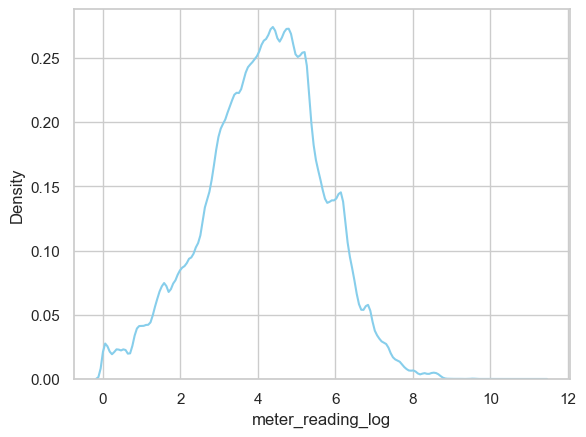

In [12]:
# Create a Seaborn kernel density estimation plot
sns.set(style="whitegrid")
kde_plot = sns.kdeplot(merged_data['meter_reading_log'], color='skyblue')

image_filename = 'seaborn_plot.png'
kde_plot.get_figure().savefig(image_filename,transparent=True)
# Convert the image to base64 format
with open(image_filename, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode('ascii')

# Display the plot (optional)
plt.show()

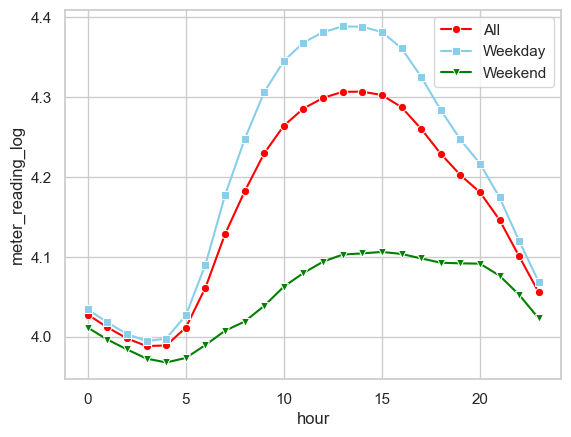

In [13]:
#Meter Reading Hourly Average Graph
hourly_avg = merged_data.groupby('hour')['meter_reading_log'].mean().reset_index()
hourly_avg_weekday = merged_data[merged_data['is_weekday']==True].groupby('hour')['meter_reading_log'].mean().reset_index()
hourly_avg_weekend = merged_data[merged_data['is_weekday']==False].groupby('hour')['meter_reading_log'].mean().reset_index()
sns.lineplot(data=hourly_avg, x='hour', y='meter_reading_log', color='red', label='All', marker='o')
sns.lineplot(data=hourly_avg_weekday, x='hour', y='meter_reading_log', color='skyblue', label='Weekday', marker='s')
sns.lineplot(data=hourly_avg_weekend, x='hour', y='meter_reading_log', color='green', label='Weekend', marker='v')
#sns.lineplot(merged_data['meter_reading_log'].loc[merged_data['is_weekday']==False], color='orange', fill=False)

# Create the Plotly figure
fig6 = go.Figure()

# Plot the lines
fig6.add_trace(go.Scatter(x=hourly_avg['hour'], y=hourly_avg['meter_reading_log'], mode='lines+markers', name='All', marker=dict(color='red')))
fig6.add_trace(go.Scatter(x=hourly_avg_weekday['hour'], y=hourly_avg_weekday['meter_reading_log'], mode='lines+markers', name='Weekday', marker=dict(color='skyblue')))
fig6.add_trace(go.Scatter(x=hourly_avg_weekend['hour'], y=hourly_avg_weekend['meter_reading_log'], mode='lines+markers', name='Weekend', marker=dict(color='green')))

# Update the layout
fig6.update_layout(
    xaxis_title='Hour',
    yaxis_title='Meter Reading Log (Hourly Average)',
    
    paper_bgcolor='seashell'  # Set the color of the background
)



# Show the figure
fig6.show()

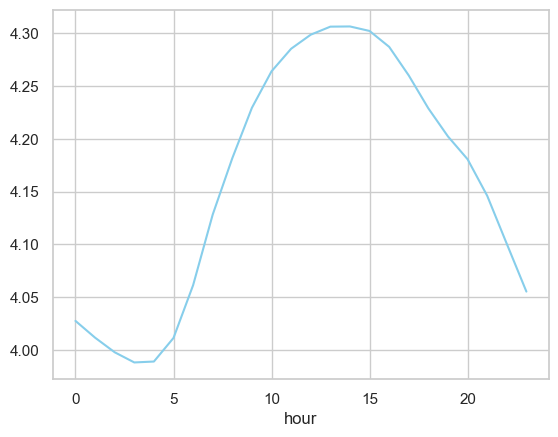

In [14]:
# Assuming train_data is your DataFrame
hour_mean = train_data.groupby('hour')['meter_reading_log'].mean()

# Create Seaborn line plot
hour_mean.plot(kind='line', color='skyblue')

# Convert Seaborn plot to Plotly figure
fig_hour_mean = make_subplots(rows=1, cols=1)

# Add Seaborn data to Plotly subplot
trace_hour_mean = go.Scatter(x=hour_mean.index, y=hour_mean.values, mode='lines', line=dict(color='skyblue'))
fig_hour_mean.add_trace(trace_hour_mean)

# Update layout with axis labels
fig_hour_mean.update_layout(
    xaxis=dict(title='Hour'),
    yaxis=dict(title='Mean of Log Meter readings'),
    paper_bgcolor='seashell',
    showlegend=False
)

In [15]:
train_data[['year','weekofyear','dayofweek']]= np.uint16(train_data['timestamp'].dt.isocalendar())

train_data.head()

,Unnamed: 0,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,...,wind_direction,wind_speed,hour,month,week,is_weekday,meter_reading_log,year,weekofyear,dayofweek
0,0,46,0,2016-01-01,53.2397,0,Retail,9045,2016.0,NaN,...,0.0,0.0,0,1,53,True,3.993413,2015,53,5
1,1,74,0,2016-01-01,43.0013,0,Parking,387638,1997.0,NaN,...,0.0,0.0,0,1,53,True,3.784219,2015,53,5
2,2,93,0,2016-01-01,52.4206,0,Office,33370,1982.0,NaN,...,0.0,0.0,0,1,53,True,3.978196,2015,53,5
3,3,105,0,2016-01-01,23.3036,1,Education,50623,NaN,5.0,...,240.0,3.1,0,1,53,True,3.190624,2015,53,5
4,4,106,0,2016-01-01,0.3746,1,Education,5374,NaN,4.0,...,240.0,3.1,0,1,53,True,0.318163,2015,53,5


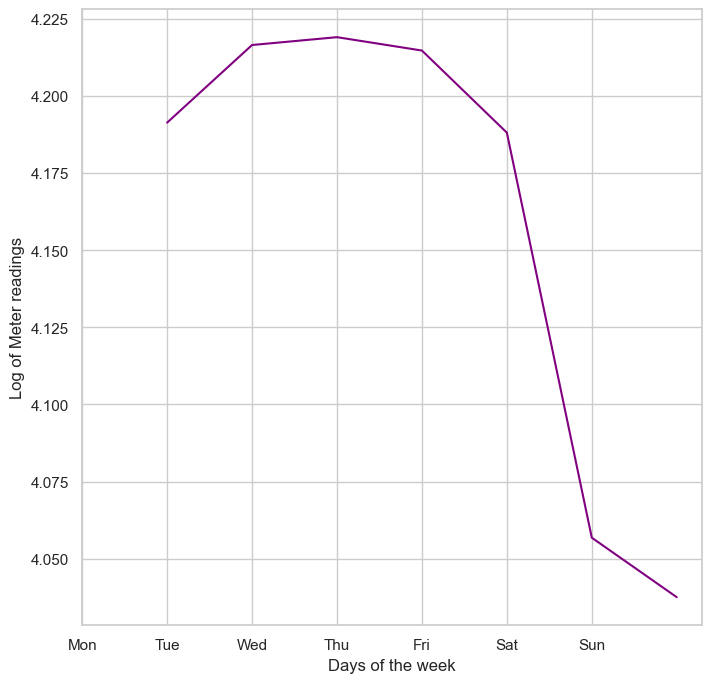

In [16]:
plt.figure(figsize=(8, 8))

day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_df = train_data.groupby(['dayofweek']).meter_reading_log.mean().reset_index()

# Create Seaborn plot
p = sns.lineplot(x=day_df['dayofweek'], y=day_df['meter_reading_log'], color='purple')
p.set_xticks(range(len(day_df['dayofweek'])))
p.set_xticklabels(day_labels)
plt.xlabel('Days of the week')
plt.ylabel("Log of Meter readings")

# Convert Seaborn plot to Plotly figure
fig8 = make_subplots(rows=1, cols=1)

# Add Seaborn data to Plotly subplot
trace = go.Scatter(x=day_df['dayofweek'], y=day_df['meter_reading_log'], mode='lines', line=dict(color='purple'))
fig8.add_trace(trace)

# Update layout if necessary
fig8.update_layout(xaxis=dict(title='Days of the week'),
                    yaxis=dict(title='Log of Meter readings'),
                   paper_bgcolor='seashell',
                    showlegend=False)



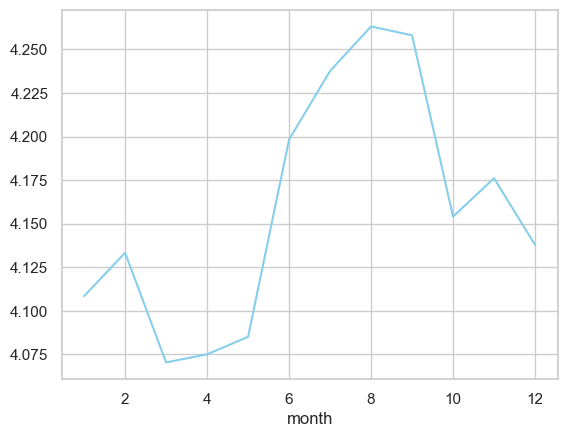

In [17]:
month_mean=train_data.groupby('month')['meter_reading_log'].mean()

month_mean.plot(kind='line',color='skyblue')

# Plot the line chart using Plotly Express
month_mean = px.line(
    x=month_mean.index,
    y=month_mean.values,
    labels={'x': 'Month', 'y': 'Mean Meter Reading'},
    title='Monthly Mean Meter Reading',
    line_shape='linear',  # Set to 'linear' for a line plot
    render_mode='svg'  # Use 'svg' for better rendering in Dash
)

In [18]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

filtered_data = merged_data[merged_data['site_id'] == 1]
sns.kdeplot(train_data['meter_reading_log'], color='blue', label='train_data', linewidth=4)
sns.kdeplot(filtered_data['meter_reading_log'], color='orange', label='site_id=1', linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id'] == 7], color='red' ,label='site_id=7', linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id'] == 10], color='purple', label='site_id=10', linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id'] == 13], color='green', label='site_id=13', linewidth=2.5)

plt.xlabel('Log-transformed Meter Reading')
plt.ylabel('Density')
plt.title('Distribution Plot with Filtered by site')
plt.legend()

fig5 = go.Figure()

# Extract the lines from the Matplotlib plot
for line in plt.gca().get_lines():
    x, y = line.get_xydata().T
    color = 'rgba({}, {}, {}, {})'.format(*[int(c * 255) for c in line.get_color()])  # Convert Matplotlib color tuple to Plotly format
    fig5.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color=color), name=line.get_label()))

# Close the Matplotlib plot to prevent it from being displayed in the notebook
plt.close()

fig5.update_layout(
    xaxis_title='Log-transformed Meter Reading',
    yaxis_title='Density',
    paper_bgcolor='seashell'  # Set the color of the background
)

# Display the Plotly figure
fig5.show()

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

filtered_data = merged_data[merged_data['primary_use'] == 'Education']
sns.kdeplot(train_data['meter_reading_log'], color='blue',label='train_data', linewidth=4)
sns.kdeplot(filtered_data['meter_reading_log'], color='orange',label='primary_use=Education',linewidth=2.5)

sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use'] == 'Lodging/residential'], color='skyblue', label='Lodging/residential',linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use'] == 'Retail'], color='red', label='Office',linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use'] == 'Public services'], color='purple', label='Public services',linewidth=2.5)
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use'] == 'Entertainment/public assembly'], color='green', label='Entertainment/public assembly',linewidth=2.5)

plt.xlabel('Log-transformed Meter Reading')
plt.ylabel('Density')
plt.title('Distribution Plot with Filtered by primary_use')
plt.legend()

fig4 = go.Figure()

# Extract the lines from the Matplotlib plot
for line in plt.gca().get_lines():
    x, y = line.get_xydata().T
    color = 'rgba({}, {}, {}, {})'.format(*[int(c * 255) for c in line.get_color()])  # Convert Matplotlib color tuple to Plotly format
    fig4.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color=color), name=line.get_label()))

# Close the Matplotlib plot to prevent it from being displayed in the notebook
plt.close()

fig4.update_layout(
    xaxis_title='Log-transformed Meter Reading',
    yaxis_title='Density',
    paper_bgcolor='seashell'  # Set the color of the background
)

# Display the Plotly figure
fig4.show()

In [20]:
#Hourly Averaged Data Grouped by primary_use
filtered_data=merged_data.groupby(['primary_use','hour'])['meter_reading_log'].mean().reset_index()
fig1 = px.scatter(filtered_data, x='hour', y='meter_reading_log', color='primary_use') 
fig1.update_layout(
    
    paper_bgcolor='seashell'  # Set the color of the background
)

fig1.show()

In [21]:
#Monthly Averaged Data Grouped by primary_use
filtered_data=merged_data.groupby(['primary_use','month'])['meter_reading_log'].mean().reset_index()
fig2 = px.scatter(filtered_data, x='month', y='meter_reading_log', color='primary_use')
fig2.update_layout(
    
    paper_bgcolor='seashell'  # Set the color of the background
)

fig2.show()

In [22]:
#Meter Reading Hourly Average Graph
hourly_avg_sites = merged_data.groupby(['hour', 'site_id'])['meter_reading_log'].mean().reset_index()
fig3 = px.scatter(hourly_avg_sites, x='hour', y='meter_reading_log', color='site_id')
fig3.update_layout(

    paper_bgcolor='seashell'  # Set the color of the background
)

fig3.show()


In [23]:
import dash
from dash import dcc
from dash import html
from datetime import datetime
from dash.dependencies import Input, Output
import plotly.express as px
from io import BytesIO


In [24]:
figure1_filename = 'fig01.png'
figure2_filename = 'fig9.png'
notebook_path = os.path.abspath("./Clustering.ipynb")
notebook_directory = os.path.dirname(notebook_path)
figure1_path = os.path.join(notebook_directory, figure1_filename)
figure2_path = os.path.join(notebook_directory, figure2_filename)
# Convert images to base64 format
with open(figure1_path, "rb") as f:
    fig01_base64 = base64.b64encode(f.read()).decode('ascii')

with open(figure2_path, "rb") as f:
    fig9_base64 = base64.b64encode(f.read()).decode('ascii')


In [25]:
'''# Load world map data
world_map = px.choropleth()

# Highlighting Philadelphia and England
world_map.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="black", showland=True)
world_map.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
world_map.update_layout(geo=dict(
    showland=True,
    landcolor="white",
    showcountries=True,
    countrycolor="black"
))

# Add markers for Philadelphia and England
locations = {"Philadelphia": {"lat": 39.9526, "lon": -75.1652}, "England": {"lat": 51.509865, "lon": -0.118092}}
world_map.add_trace(px.scatter_geo(lon=[locations["Philadelphia"]["lon"], locations["England"]["lon"]],
                                    lat=[locations["Philadelphia"]["lat"], locations["England"]["lat"]],
                                    text=["Philadelphia", "England"]).data)'''


'# Load world map data\nworld_map = px.choropleth()\n\n# Highlighting Philadelphia and England\nworld_map.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="black", showland=True)\nworld_map.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)\nworld_map.update_layout(geo=dict(\n    showland=True,\n    landcolor="white",\n    showcountries=True,\n    countrycolor="black"\n))\n\n# Add markers for Philadelphia and England\nlocations = {"Philadelphia": {"lat": 39.9526, "lon": -75.1652}, "England": {"lat": 51.509865, "lon": -0.118092}}\nworld_map.add_trace(px.scatter_geo(lon=[locations["Philadelphia"]["lon"], locations["England"]["lon"]],\n                                    lat=[locations["Philadelphia"]["lat"], locations["England"]["lat"]],\n                                    text=["Philadelphia", "England"]).data)'

In [26]:
def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    
    return br_list

In [27]:
'''colors= {
    'background': 'seashell'}
app = dash.Dash()
app.layout = html.Div(
    children= [
        html.H1("Electricity Consumption Prediction Model",style={'textAlign': 'left',"color":"indianred"}),
        html.Span(children=[f"Date: {datetime.now().date()}",
                html.Br()," Prepared by ",
                html.B("FORESQUAD,")],
                style={'color': 'indianred'}),
        
        html.H3("Explanatory Data Analysis of ASHRAE Great Energy Predictor Dataset",style={'textAlign': 'left',"color":"indianred"}),  
        *make_break(2),
        html.H3('Density Estimation Graph',style={'textAlign': 'left',"color":"royalblue"}),
        html.Img(src=f"data:image/png;base64,{image_base64}", style={'width': '50%'}),
        html.Br(),
        html.H3("Mean of Log Meter Readings by Hour",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id ="fig_hour_mean",figure = fig_hour_mean,style={'width': '65%', 'height': '75%'}),
        html.Br(),
        html.H3('Mean of Log Meter Readings by Hour',style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="sixth",figure=fig6,style={'width': '65%', 'height': '75%'}),
        html.Br(),
        html.H3("Log Meter Readings Through The Week",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="eighth",figure=fig8,style={'width': '65%', 'height': '75%'}),
        html.Br(),
        html.H3("Hourly Averaged Meter Readings by Primary Use",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id='first-graph',figure=fig1,style={'width': '75%', 'height': '75%','textAlign': 'left','backgroundColor': 'lightblue'}),
        html.Br(),
        html.H3("Hourly Averaged Meter Readings by Site Id",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="third-graph",figure =fig3,style={'width': '65%', 'height': '60%','textAlign': 'left'}),
        html.Br(),
        html.H3("Monthly Averaged Meter Readings by Primary Use",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="second-graph",figure =fig2,style={'width': '75%', 'height': '75%'}),
        html.Br(),
        html.H3("Distribution Plot with Filtered by Primary Use",style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="fourth",figure=fig4,style={'width': '75%', 'height': '75%'}),
        html.Br(),
        html.H3('Distribution Plot with Filtered by Site Id',style={'textAlign': 'left',"color":"royalblue"}),
        dcc.Graph(id="fifth",figure=fig5,style={'width': '75%', 'height': '75%'}),
        html.H3('Trend Components for Each Site',style={'textAlign': 'left',"color":"royalblue"}),
        html.Img(src=f"data:image/png;base64,{fig01_base64}", style={'width': '75%'}),
        html.H3('K-Means Clustering Results',style={'textAlign': 'left',"color":"royalblue"}),      
        html.Img(src=f"data:image/png;base64,{fig9_base64}", style={'width': '75%'})],

     style={'backgroundColor': colors['background']}
)'''

'colors= {\n    \'background\': \'seashell\'}\napp = dash.Dash()\napp.layout = html.Div(\n    children= [\n        html.H1("Electricity Consumption Prediction Model",style={\'textAlign\': \'left\',"color":"indianred"}),\n        html.Span(children=[f"Date: {datetime.now().date()}",\n                html.Br()," Prepared by ",\n                html.B("FORESQUAD,")],\n                style={\'color\': \'indianred\'}),\n        \n        html.H3("Explanatory Data Analysis of ASHRAE Great Energy Predictor Dataset",style={\'textAlign\': \'left\',"color":"indianred"}),  \n        *make_break(2),\n        html.H3(\'Density Estimation Graph\',style={\'textAlign\': \'left\',"color":"royalblue"}),\n        html.Img(src=f"data:image/png;base64,{image_base64}", style={\'width\': \'50%\'}),\n        html.Br(),\n        html.H3("Mean of Log Meter Readings by Hour",style={\'textAlign\': \'left\',"color":"royalblue"}),\n        dcc.Graph(id ="fig_hour_mean",figure = fig_hour_mean,style={\'width\': \'65

In [48]:
colors = {'background': 'seashell'}

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.Span(children=[f"Date: {datetime.now().date()}",
                        html.Br(), " Prepared by ",
                        html.B("FORESQUAD,")],
              style={'color': 'indianred'}),

    html.H1("Electricity Consumption Prediction Dashboard", style={'textAlign': 'left', "color": "indianred"}),

    # EDA Results
    html.Div([
        html.H2("Hourly Averaged Meter Readings by Primary Use",
                style={'textAlign': 'left', "color": "royalblue"}),

        # Add your EDA figures here
        # For example, a histogram of consumption
        dcc.Graph(
            id='first-graph', figure=fig1, style={'width': '50%', 'height': '50%', 'textAlign': 'left',
                                                  'backgroundColor': 'lightblue'}),
    ]),

    html.Div([
        # Dropdown for selecting time interval
        dcc.Dropdown(
            id='time-interval-dropdown',
            options=[
                {'label': 'Hourly', 'value': 'hourly'},
                {'label': 'Weekly', 'value': 'weekly'},
                {'label': 'Monthly', 'value': 'monthly'},
            ],
            value='hourly',  # Default selection
            style={'width': '33%', 'height': '%50'}),

        # Dropdown for selecting site
        dcc.Dropdown(
            id='site-dropdown',
            options=[{'label': f'Site {i}', 'value': i} for i in range(0, 15)],
            value=1,  # Default selection
            style={'width': '33%'}
        ),
    ], style={'display':'flex','flexDirection': 'row', 'backgroundColor': colors['background']}),

    # Graph for displaying model performance
    dcc.Graph(id='model-performance-graph',style={'display': 'inline-block','width': '50%', 'height': '50%'}),
    dcc.Graph(id='site-distribution-plot',style={'display': 'inline-block','width': '50%', 'height': '50%'}),

], style={'display': 'flex', 'flexDirection': 'column'})

# Callbacks...

def generate_distribution_plot(selected_site):
    plt.figure(figsize=(15, 8))
    sns.set(style="whitegrid")

    sns.kdeplot(merged_data['consumption'], color='blue', label='All Sites', linewidth=4)
    sns.kdeplot(merged_data[merged_data['site_id'] == selected_site]['consumption'], color='orange', label=f'Site {selected_site}', linewidth=2.5)

    plt.xlabel('Consumption')
    plt.ylabel('Density')
    plt.title(f'Distribution Plot with Filtered by Site - Site {selected_site}')
    plt.legend()

    # Convert Matplotlib plot to Plotly trace
    img = BytesIO()
    plt.savefig(img, format='png')
    img_str = "data:image/png;base64," + base64.b64encode(img.getvalue()).decode()
    plt.close()

    return go.Scatter(x=merged_data['timestamp'], y=merged_data['consumption'], mode='lines', name=f'Site {selected_site}')

# Callback to update the site distribution plot based on the selected site
@app.callback(
    Output('site-distribution-plot', 'figure'),
    [Input('site-dropdown', 'value')]
)

def update_site_distribution_plot(selected_site):
    try:
        return generate_distribution_plot(selected_site)
    except Exception as e:
        # Print the exception to understand the error
        print(f"Error in update_site_distribution_plot: {str(e)}")

        # Return an empty or default plot
        return px.scatter()

# Callback to update the model performance graph based on the selected time interval
@app.callback(
    Output('model-performance-graph', 'figure'),
    [Input('time-interval-dropdown', 'value')]
)
def update_model_performance(selected_interval):
    # Choose the appropriate graph based on the selected interval
    if selected_interval == 'hourly':
        return fig_hour_mean
    elif selected_interval == 'weekly':
        return fig8
    elif selected_interval == 'monthly':
        return month_mean

<Figure size 1500x800 with 0 Axes>

In [49]:
if __name__== '__main__':
    app.run_server(debug=True,mode='external',host = "0.0.0.0",port=8080)

Error in update_site_distribution_plot: 'consumption'
Error in update_site_distribution_plot: 'consumption'


In [30]:
# http://127.0.0.1:8080/

Error in update_site_distribution_plot: 'consumption'
Error in update_site_distribution_plot: 'consumption'
